Importing Basic Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

Loading the dataset:

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
def info_dataset(df, head=5):
    print("Shape")
    print(df.shape)

    print("Info") 
    print(df.info())
    
    print("Columns")
    print(df.columns)

    print("Types")
    print(df.dtypes)

    print("NA")
    print(df.isnull().sum())

    print("Describe")
    print(df.describe().T)
    
info_dataset(df)


Shape
(8807, 12)
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
Columns
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Types
show_id         object
type        

In [4]:
df.drop(df[['description','cast']], axis=1, inplace=True)
df.head()

show_id     type                  title         director        country  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1      s2  TV Show          Blood & Water              NaN   South Africa   
2      s3  TV Show              Ganglands  Julien Leclercq            NaN   
3      s4  TV Show  Jailbirds New Orleans              NaN            NaN   
4      s5  TV Show           Kota Factory              NaN          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  
0                                      Documentaries  
1    International TV Shows, TV Dramas, TV Mysteries  
2  Crime TV Shows, International TV Shows, TV Act...  
3                             Docuseries, Reality TV  
4  International TV Shows, Romantic TV Shows, TV ...

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [6]:
df['country']=df['country'].fillna('No Data')
df['director']=df['director'].replace(np.nan, 'No Data')

In [7]:
df=df.dropna()
df=df.drop_duplicates()
df = df.rename(columns={"listed_in":"genre"})
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
dtype: int64

In [8]:
df['type'].value_counts()
df['type'] = pd.Categorical(df['type'])

Movie and TV Distribution on Netflix

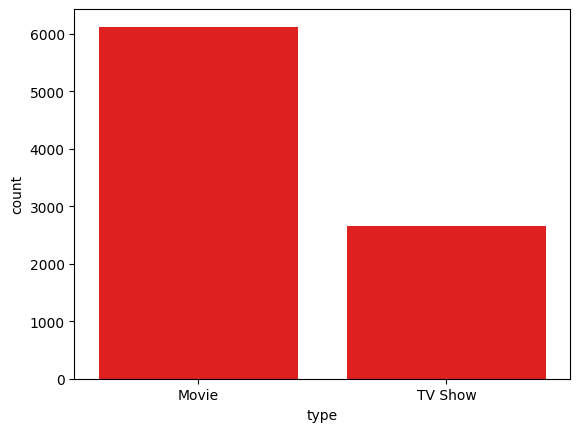

In [9]:
sns.countplot(x='type',data=df,color='red')
plt.show()

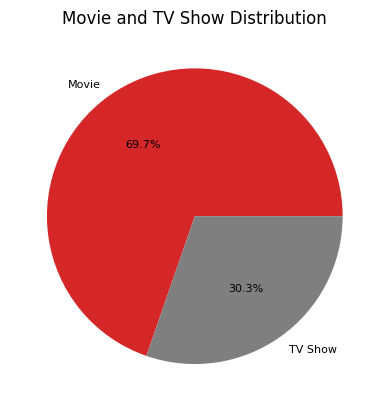

<Figure size 2500x2000 with 0 Axes>

In [10]:
x = df['type'].value_counts()
labels = df['type'].unique()
colors = [ 'tab:red', 'tab:gray']
fig, ax = plt.subplots()
plt.figure(figsize=(25,20))
ax.pie(x, labels = labels, colors = colors,textprops={'fontsize': 8},autopct='%1.1f%%')
ax.set_title('Movie and TV Show Distribution')
plt.show()

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14692\2162515907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["release_year"],color='red')


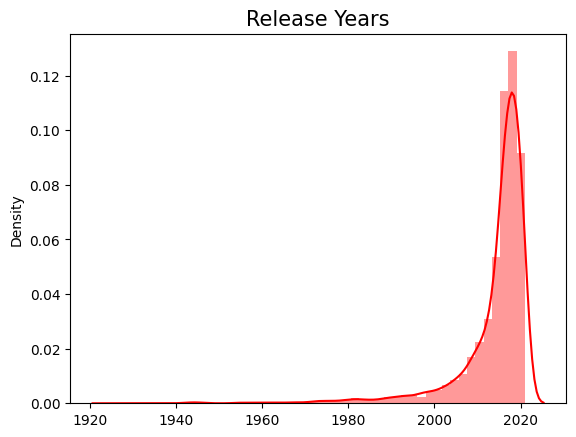

In [11]:
sns.distplot(x=df["release_year"],color='red')
plt.title("Release Years", size=15)
plt.show()

In [12]:
import plotly.express as px 
year_df=df[['release_year','type']]
year_df=year_df.groupby(['release_year','type']).size().reset_index(name='Content')
year_df=year_df[year_df['release_year']>2000]
fig3 = px.line(year_df, x="release_year", y="Content", color='type',title='Content added over the years on Streaming Netflix')
fig3.show()

Top 10 countries with Netflix Content

In [13]:
countries = df['country'].value_counts().head(10)
top_country = pd.DataFrame({'labels': countries.index,'values': countries.values})
top_country.drop(labels=[2], axis=0,inplace=True)
top_country

labels  values
0   United States    2809
1           India     972
3  United Kingdom     418
4           Japan     243
5     South Korea     199
6          Canada     181
7           Spain     145
8          France     124
9          Mexico     110

Text(0, 0.5, 'No of Movie/TV Shows')

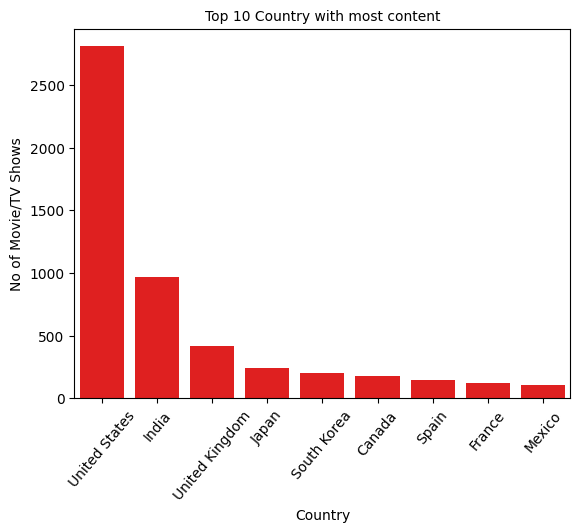

In [14]:
ax = sns.barplot(x = top_country['labels'], y = top_country['values'], color='red')
ax.tick_params(axis='x', rotation=50)
ax.set_title("Top 10 Country with most content", size =10)
ax.set_xlabel("Country", size = 10)
ax.set_ylabel('No of Movie/TV Shows', size = 10)

Text(0.5, 1.0, ' Which country produced more movies and TV shows ')

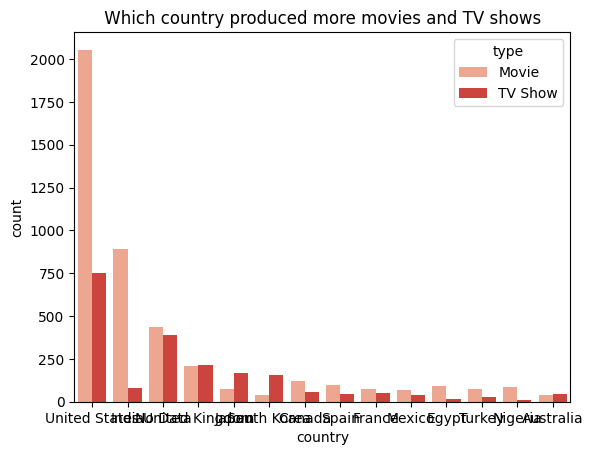

In [15]:
sns.countplot(x = df['country'] ,hue=df['type'],palette='Reds' ,order=df['country'].value_counts().index[0:14],data = df)
plt.title(' Which country produced more movies and TV shows ') 

<AxesSubplot: xlabel='release_year', ylabel='count'>

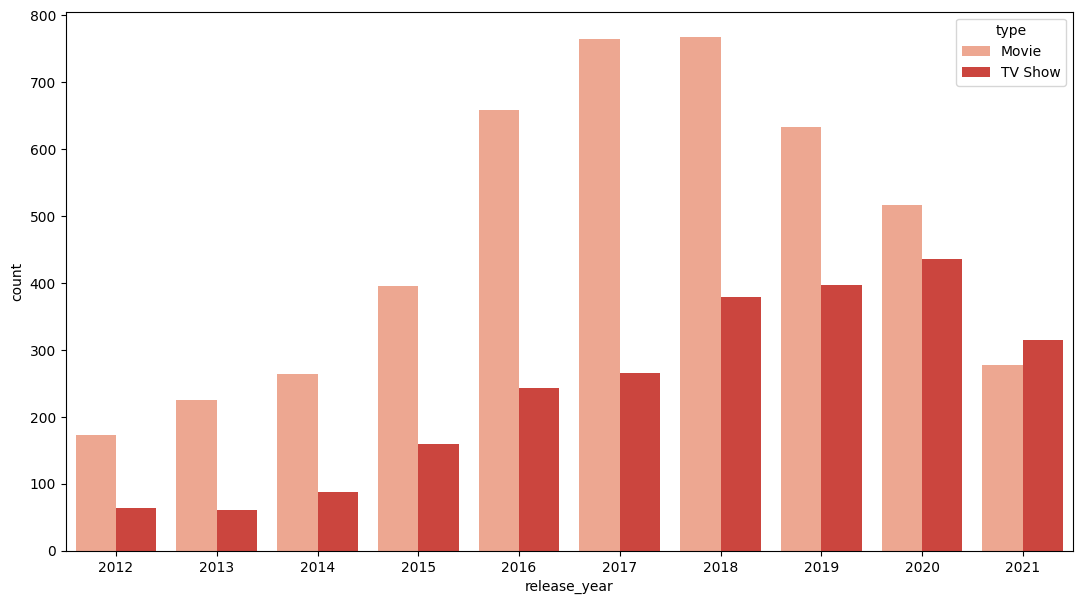

In [19]:
plt.figure(figsize=(13,7))
sns.countplot(x = df['release_year'] ,data=df,hue=df['type'], order=df['release_year'].value_counts().index[0:10].sort_values(),palette='Reds')

<AxesSubplot: xlabel='added_year', ylabel='count'>

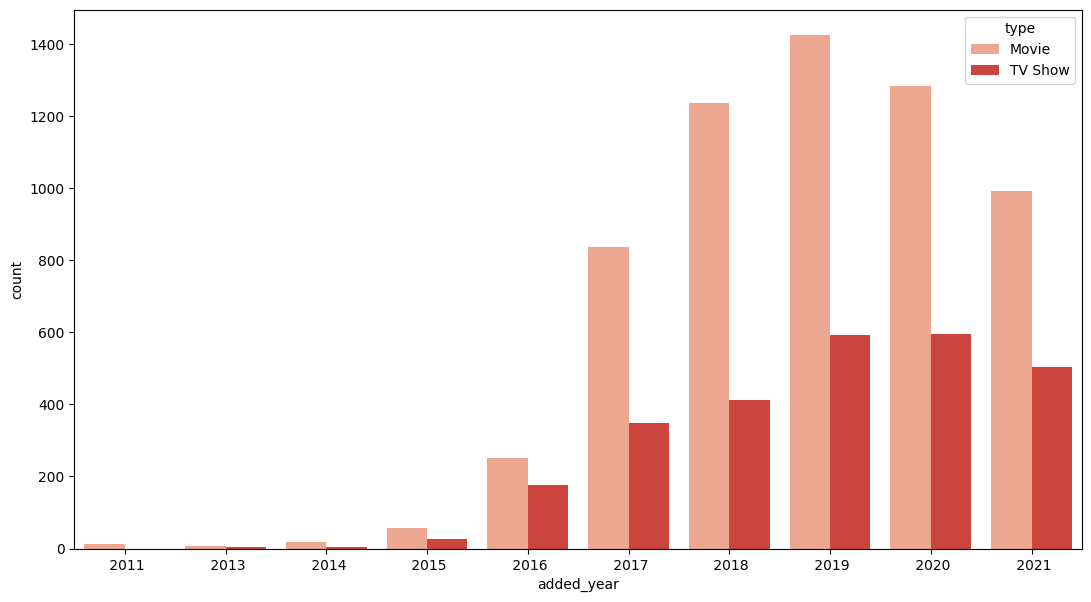

In [48]:
plt.figure(figsize=(13,7))
sns.countplot(x = df['added_year'] ,data=df,hue=df['type'], order=df['added_year'].value_counts().index[0:10].sort_values(),palette='Reds')

<AxesSubplot: xlabel='rating', ylabel='count'>

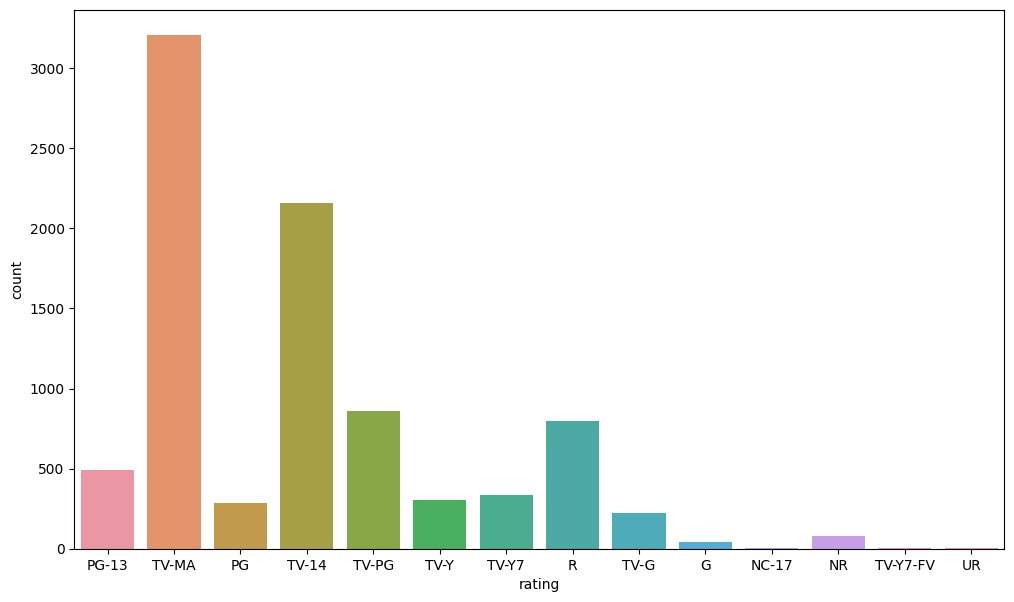

In [20]:
plt.figure(figsize = (12,7))
sns.countplot(x=df['rating'],data = df)

The graph above demonstrates that a significant portion of Netflix content is classified as "TV-MA," which means that the major part of the content available on Netflix is intended for mature and adult audiences.

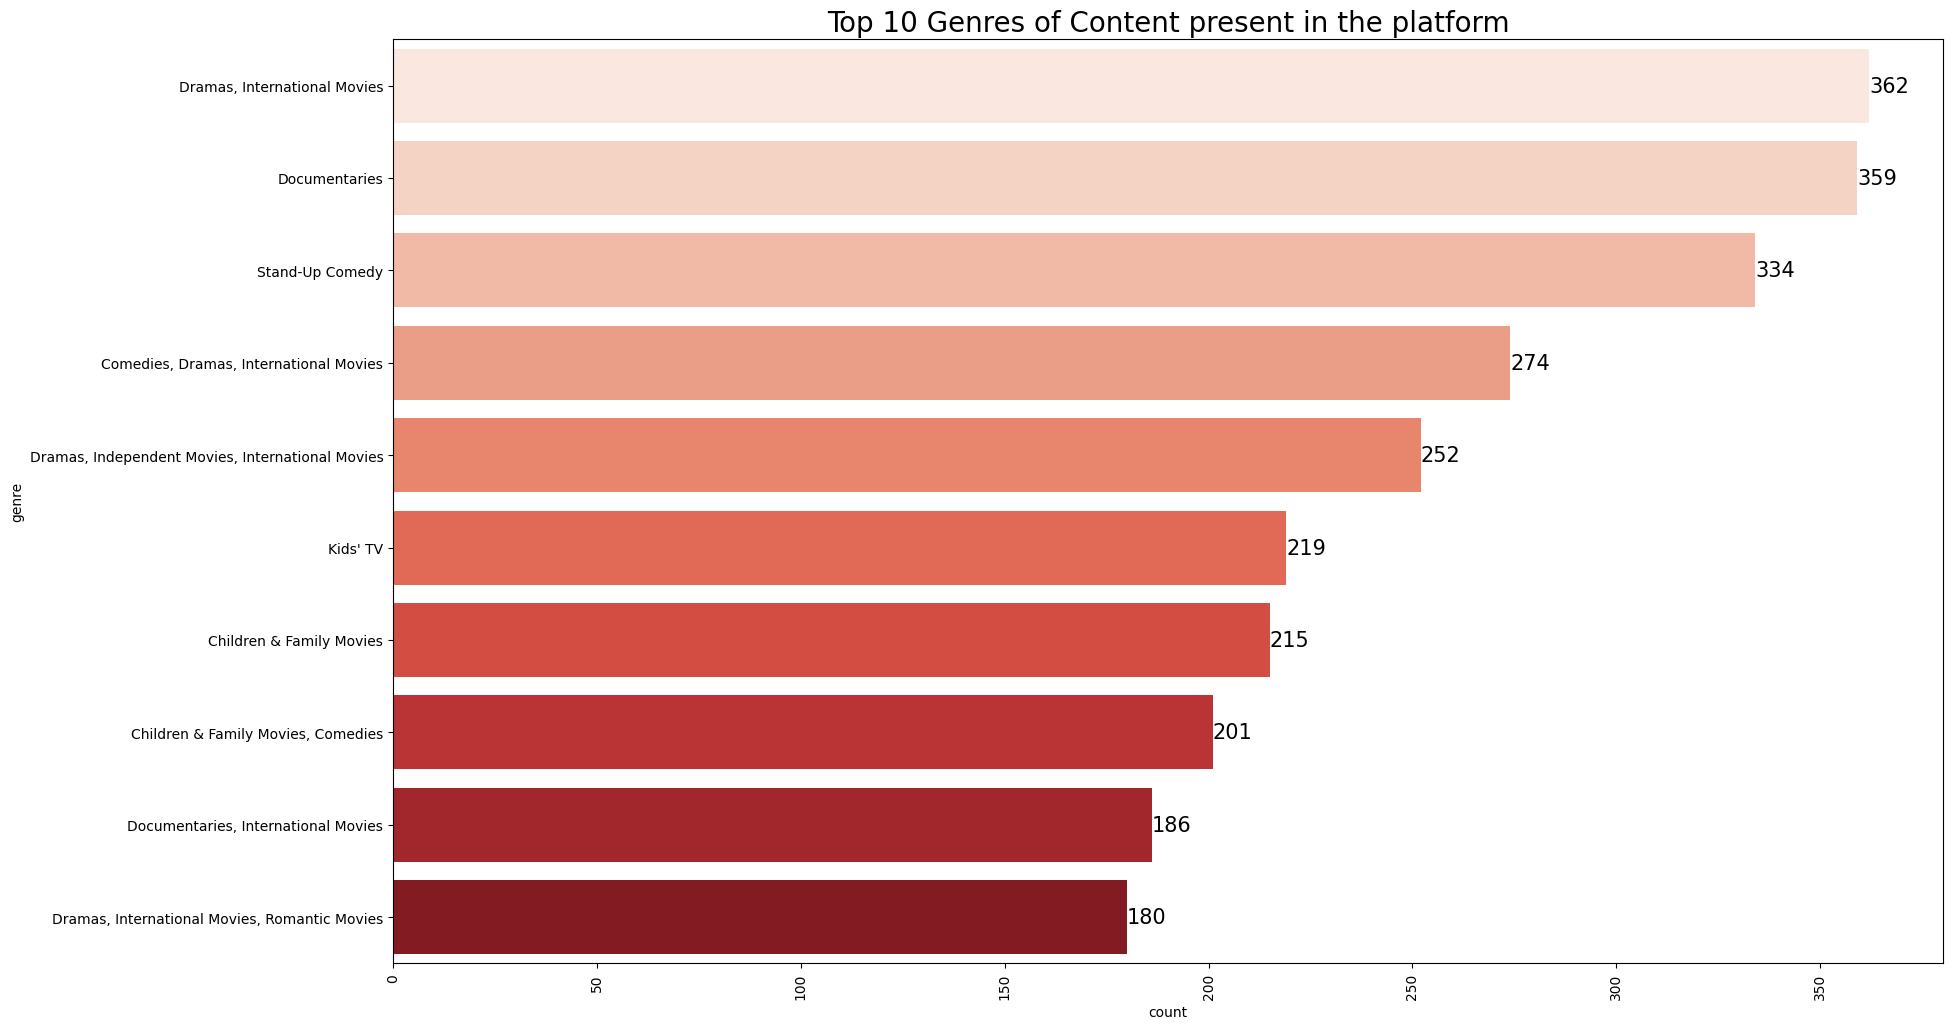

In [21]:
plt.figure(figsize=(20, 12))
plt.title("Top 10 Genres of Content present in the platform",fontsize=20)
c1=sns.countplot(y='genre',data=df,palette="Reds",order=df.genre.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='rating', ylabel='count'>

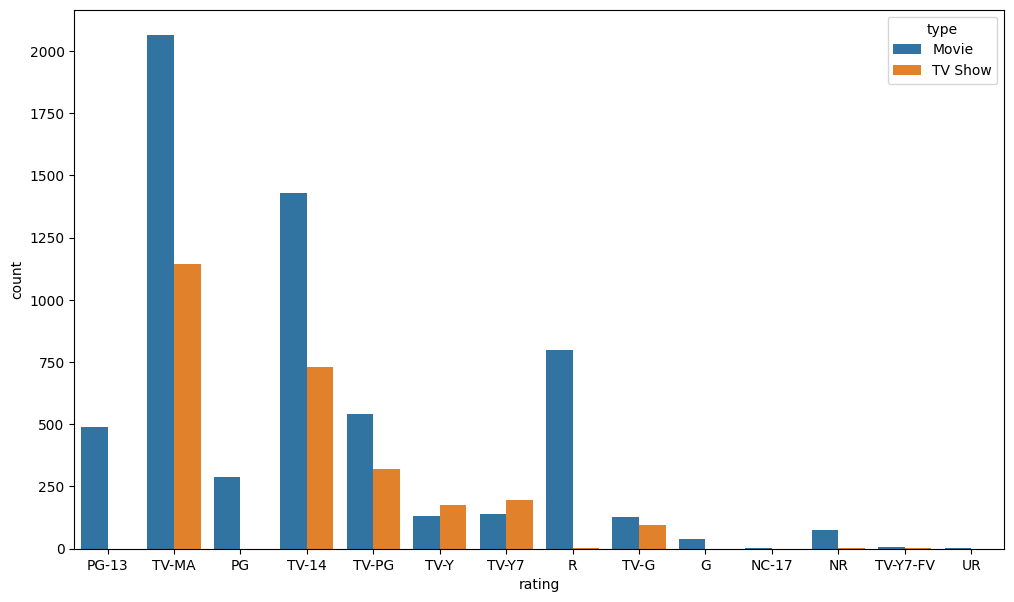

In [24]:
plt.figure(figsize = (12,7))
sns.countplot(x='rating',data = df,hue='type')

In [25]:
age_cat = {
    'TV-PG': 'Parental Guidance',
    'TV-MA' : 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
df['rating']=df['rating'].replace(age_cat)

Text(0, 0.5, 'No of Movies')

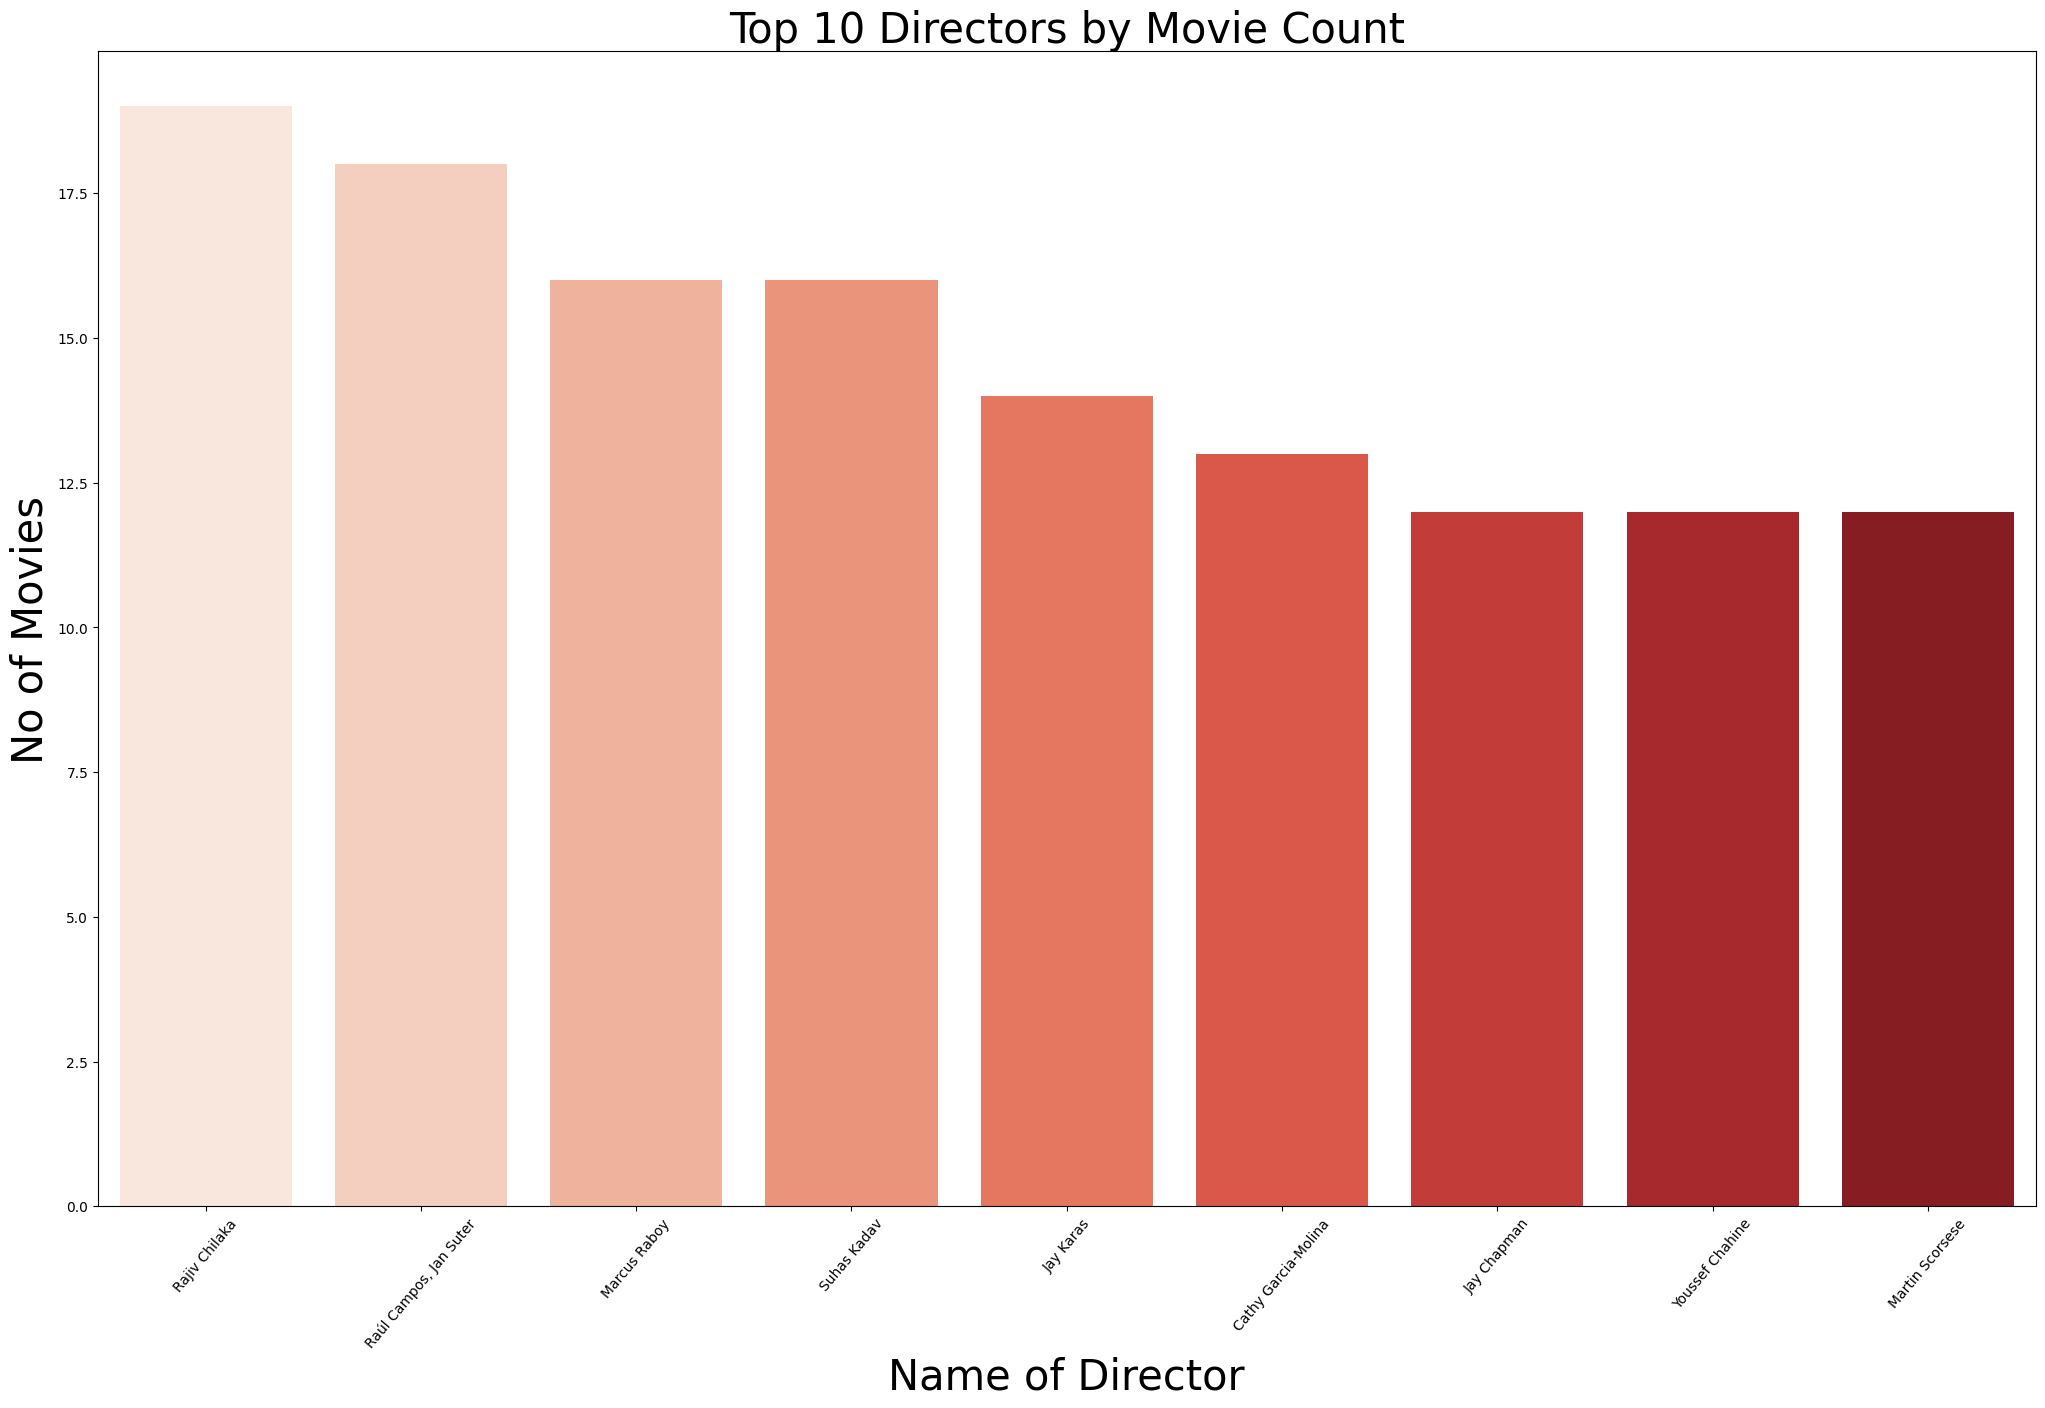

In [27]:
most_books = df.groupby('director')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('director', )
most_books.drop('No Data',inplace=True)
plt.figure(figsize=(25,15))
x = sns.barplot(x = most_books.index, y = most_books['title'], orient = 'v',palette='Reds')
x.tick_params(axis='x', rotation=50)
x.set_title("Top 10 Directors by Movie Count", size = 30)
x.set_xlabel("Name of Director", size =30)
x.set_ylabel('No of Movies', size =30)

In [28]:
movie_df = df[df['type'] == 'Movie']
print('Number of movies in the dataset : ', movie_df.shape[0])
movie_df['duration'] = movie_df['duration'].str.replace(' min', '')
duration = movie_df['duration'].astype('float64')
duration.describe()

Number of movies in the dataset :  6126


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14692\2014927524.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [29]:
tv_df =df[df['type'] == 'TV Show']
print('Number of TV Shows in the dataset : ', tv_df.shape[0])
tv_df['duration'] = tv_df['duration'].str.replace(' Season', '') # Duration = no. of seasons
tv_df['duration'] = tv_df['duration'].str.replace('s', '')
seasons = tv_df['duration'].astype('int64')

Number of TV Shows in the dataset :  2664


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14692\1611495257.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14692\1611495257.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



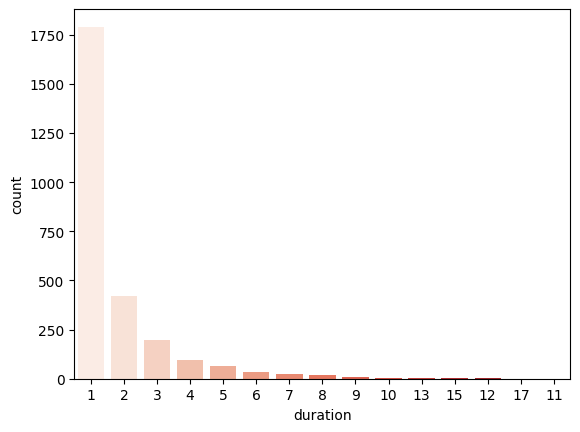

In [30]:
sns.countplot(x ='duration', data = tv_df ,order=tv_df['duration'].value_counts().index,palette='Reds')
plt.show()

In [31]:
most_seasons = tv_df[['duration', 'title']].sort_values('duration', ascending=False)[:10]
most_seasons
most_seasons['duration'] = most_seasons['duration'].astype('int64')

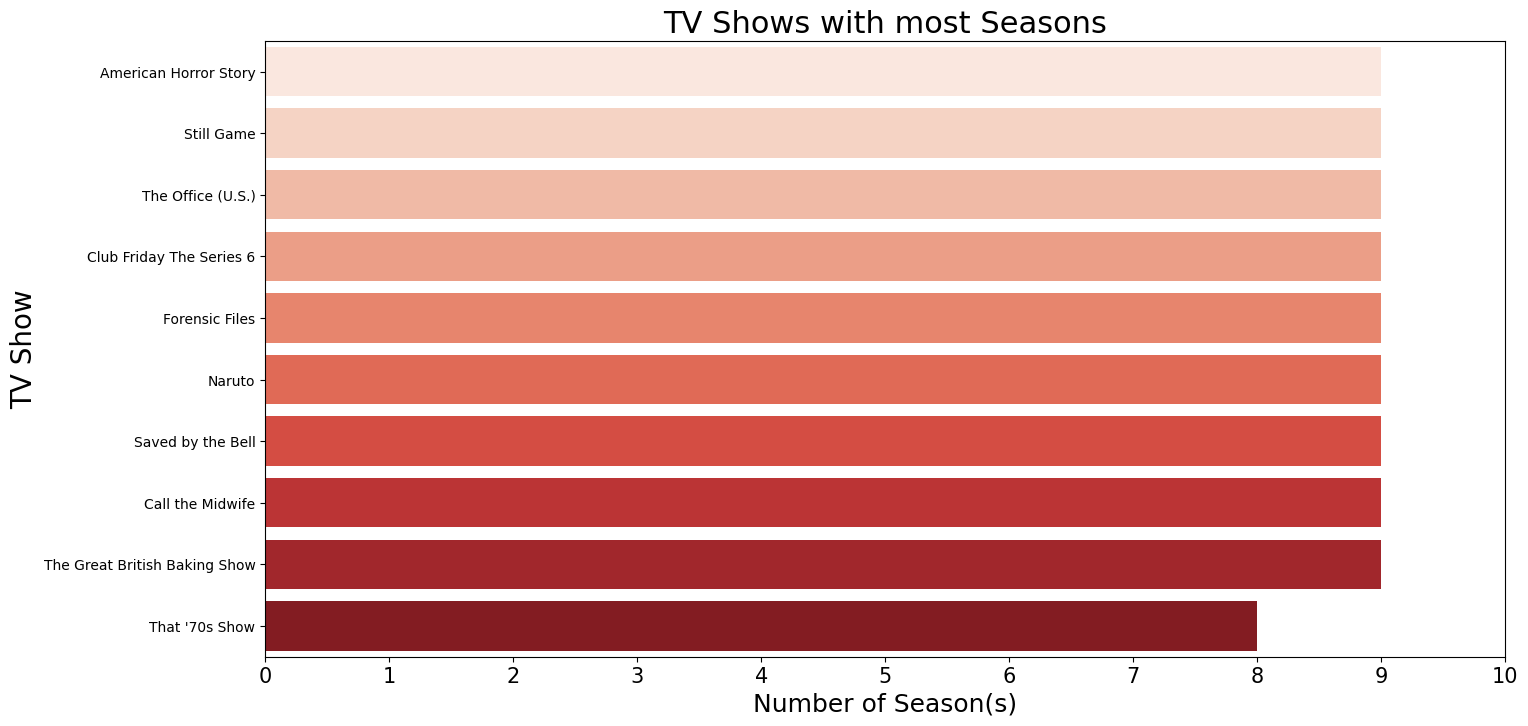

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(data = most_seasons, y='title', x='duration',palette='Reds')
plt.ylabel('TV Show', fontsize=20)
plt.xlabel('Number of Season(s)', fontsize=18)
plt.xticks(range(0,11), fontsize=15)
plt.title('TV Shows with most Seasons', fontsize=22)
plt.show()

In [33]:
release_m = pd.DataFrame(movie_df.release_year.value_counts()).sort_index()
release_m

release_year
1942             2
1943             3
1944             3
1945             3
1946             1
...            ...
2017           765
2018           767
2019           633
2020           517
2021           277

[73 rows x 1 columns]

Text(0.5, 1.0, 'Distribution of movies on Netflix as per release year')

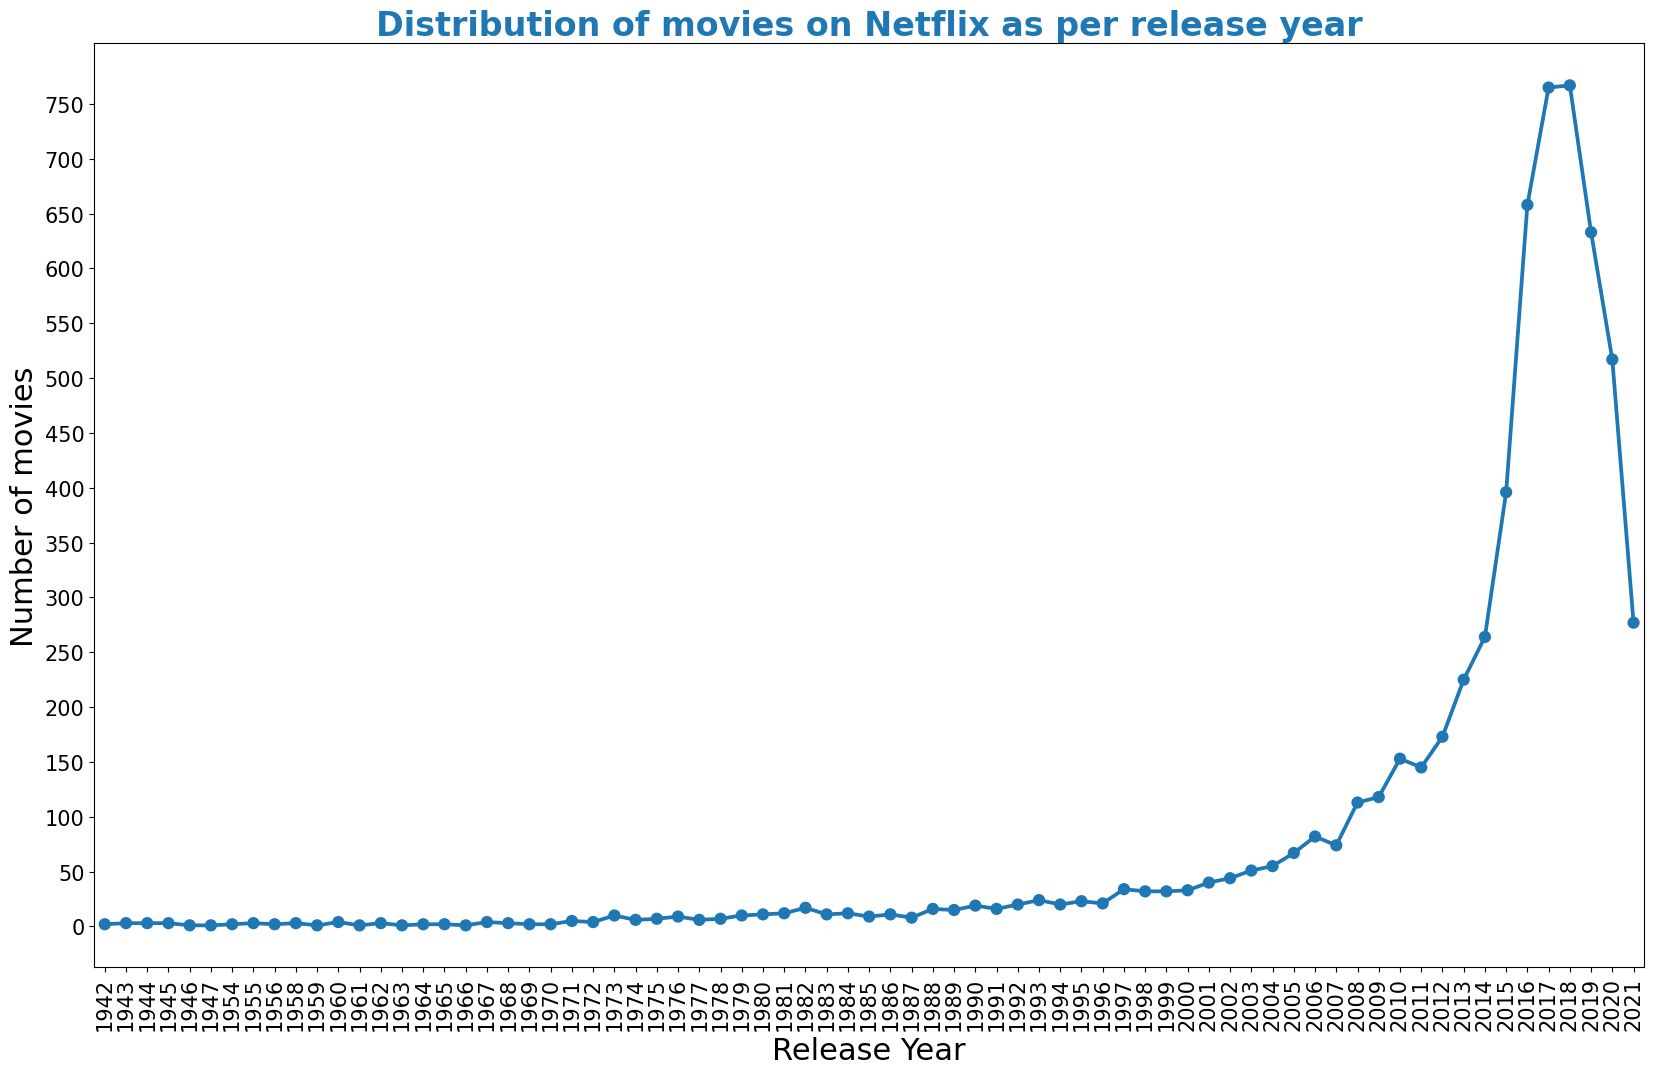

In [34]:
plt.figure(figsize=(20,12))
sns.pointplot(x = release_m.index, y = release_m.release_year)
plt.xticks(rotation=90, fontsize =15)
plt.yticks(range(0,800,50), fontsize = 15)
plt.xlabel('Release Year', fontsize=22)
plt.ylabel('Number of movies', fontsize=22)
plt.title('Distribution of movies on Netflix as per release year', fontsize=24, weight='bold', color='tab:blue')

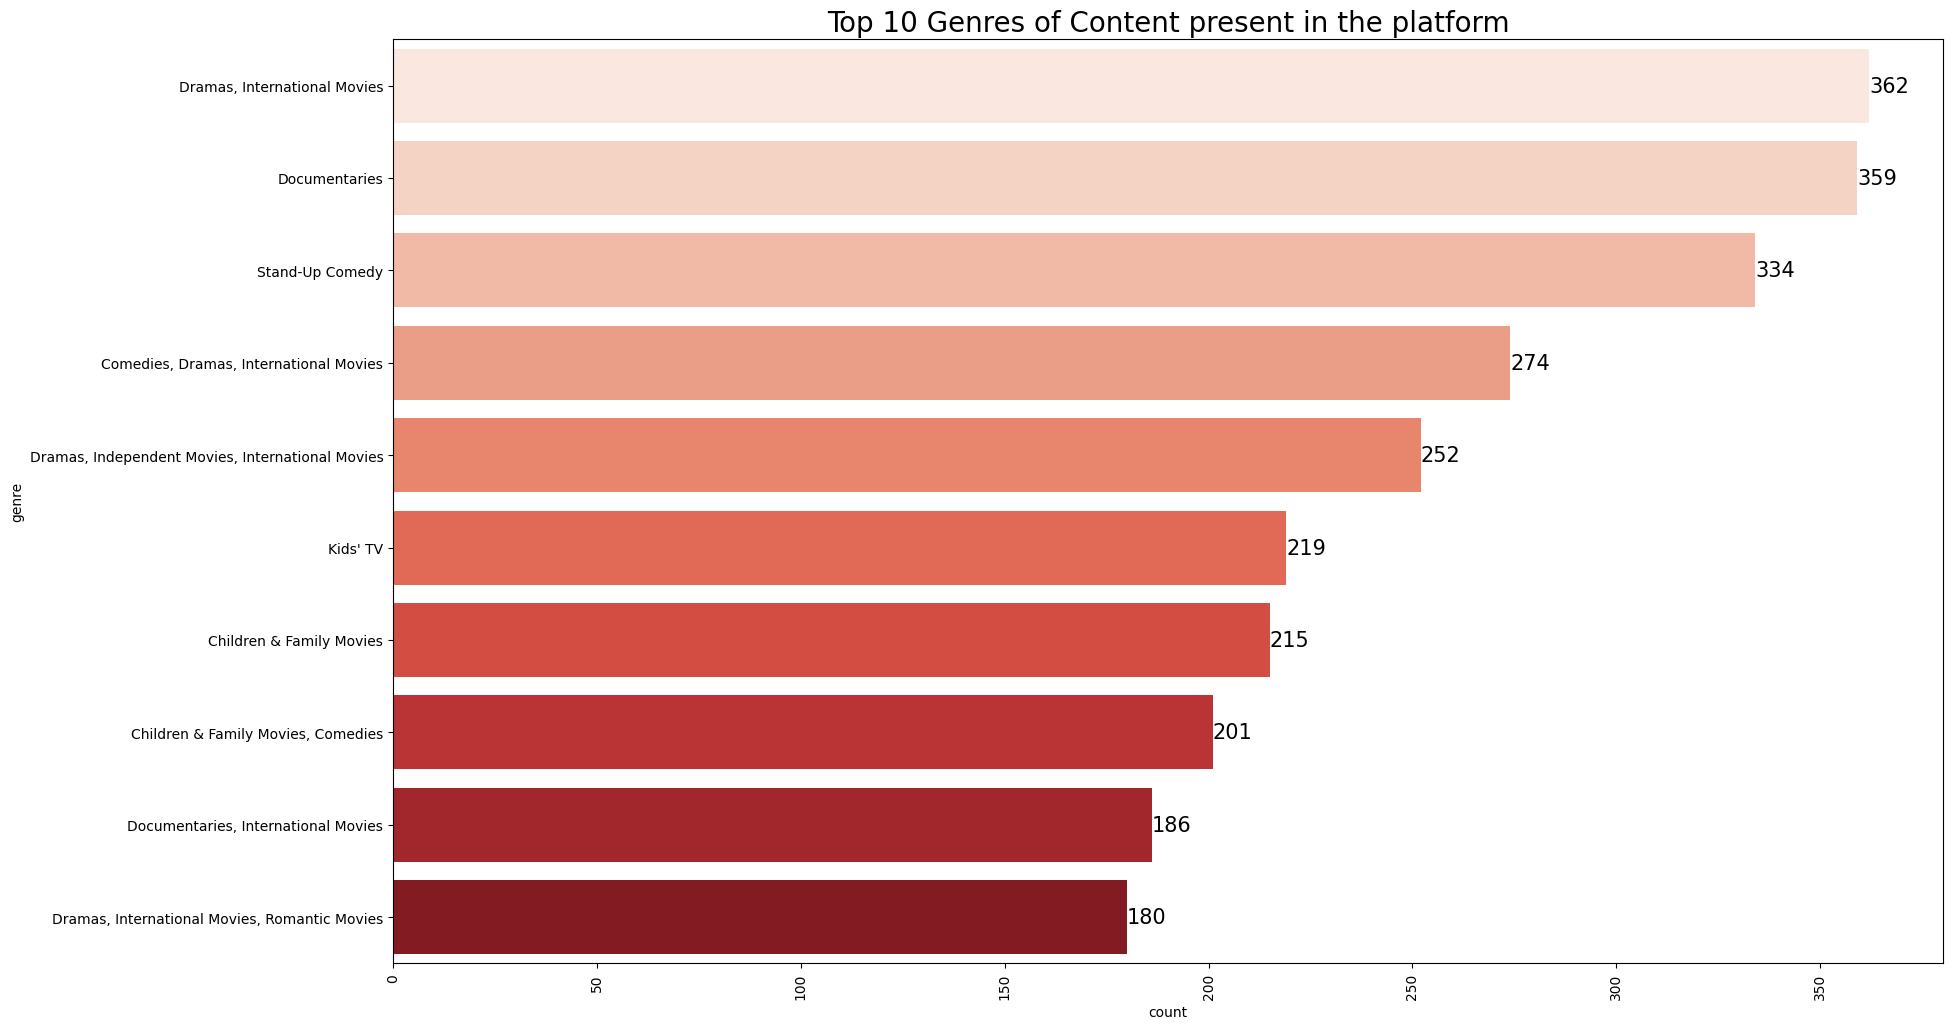

In [35]:
plt.figure(figsize=(20, 12))
plt.title("Top 10 Genres of Content present in the platform",fontsize=20)
c1=sns.countplot(y='genre',data=df,palette="Reds",order=df.genre.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

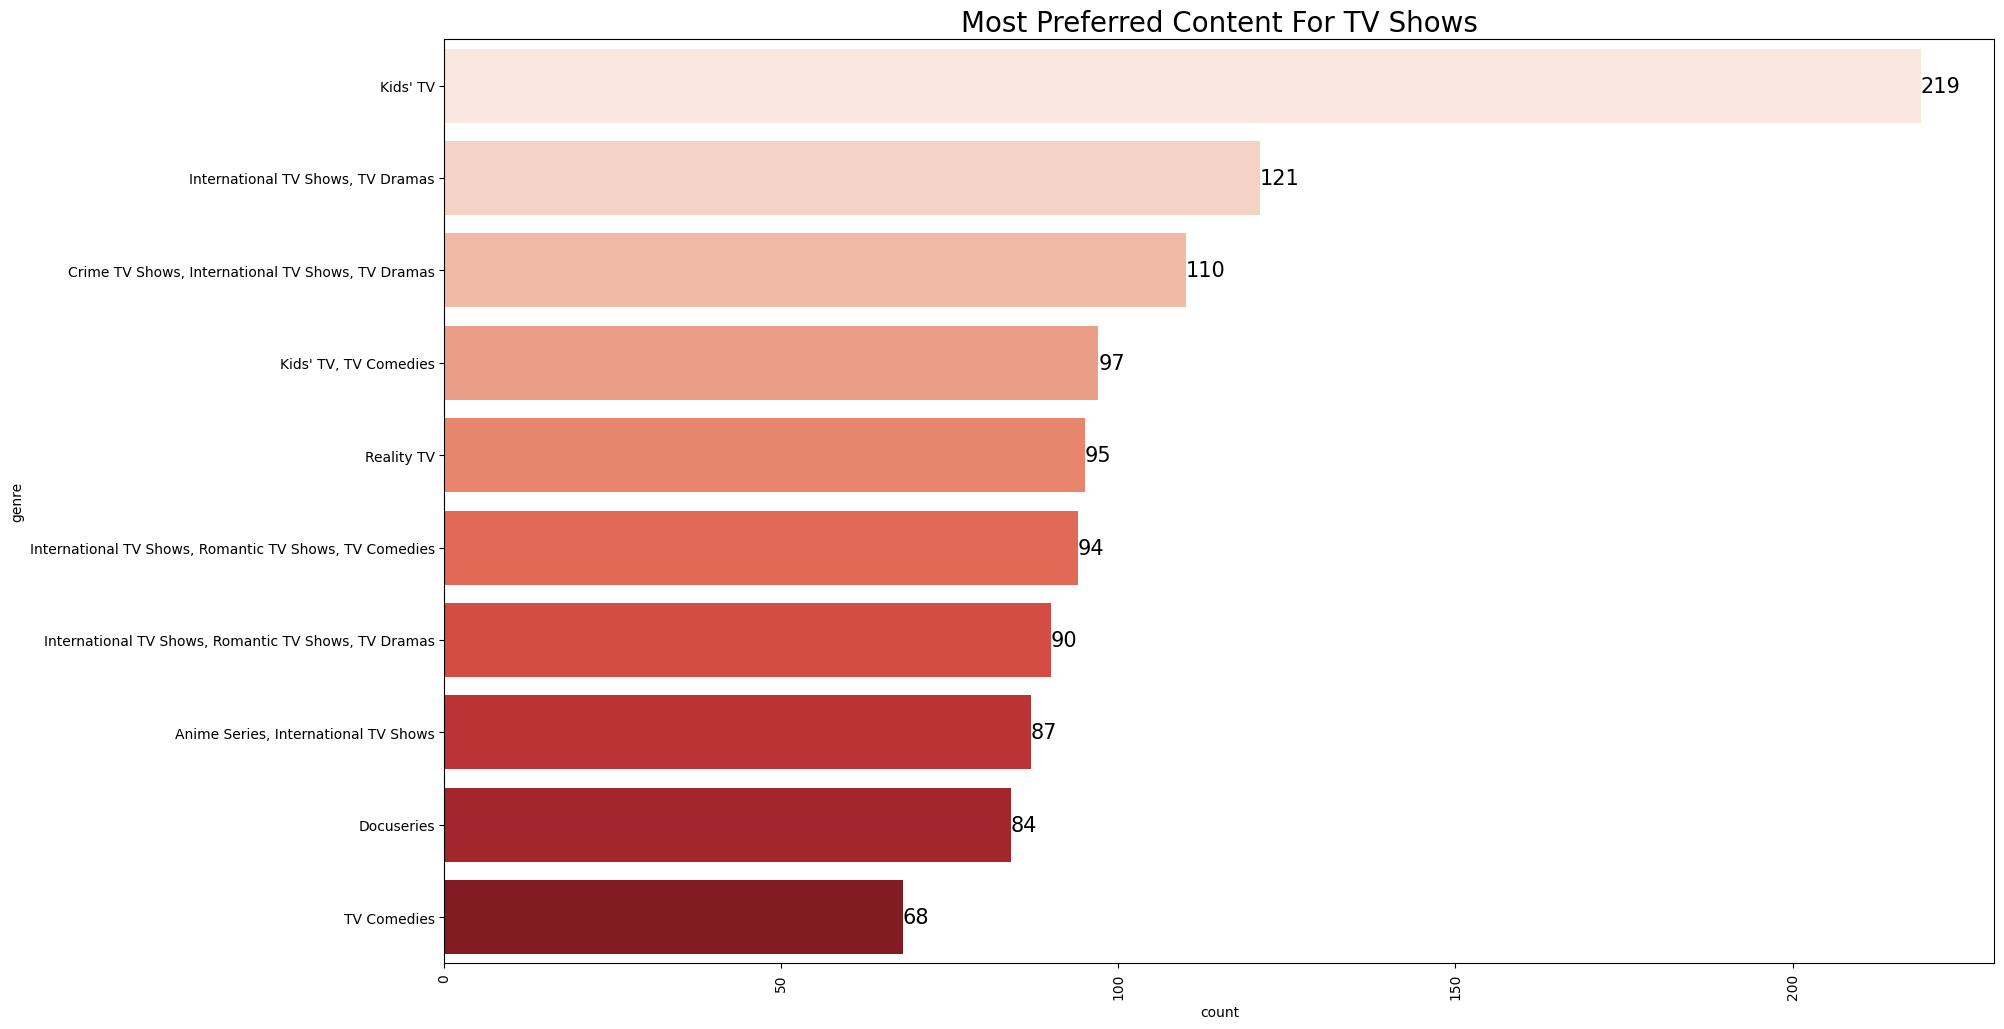

In [36]:
plt.figure(figsize=(20, 12))
plt.title("Most Preferred Content For TV Shows",fontsize=20)
c1=sns.countplot(y='genre',data=tv_df,palette="Reds",order=tv_df.genre.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

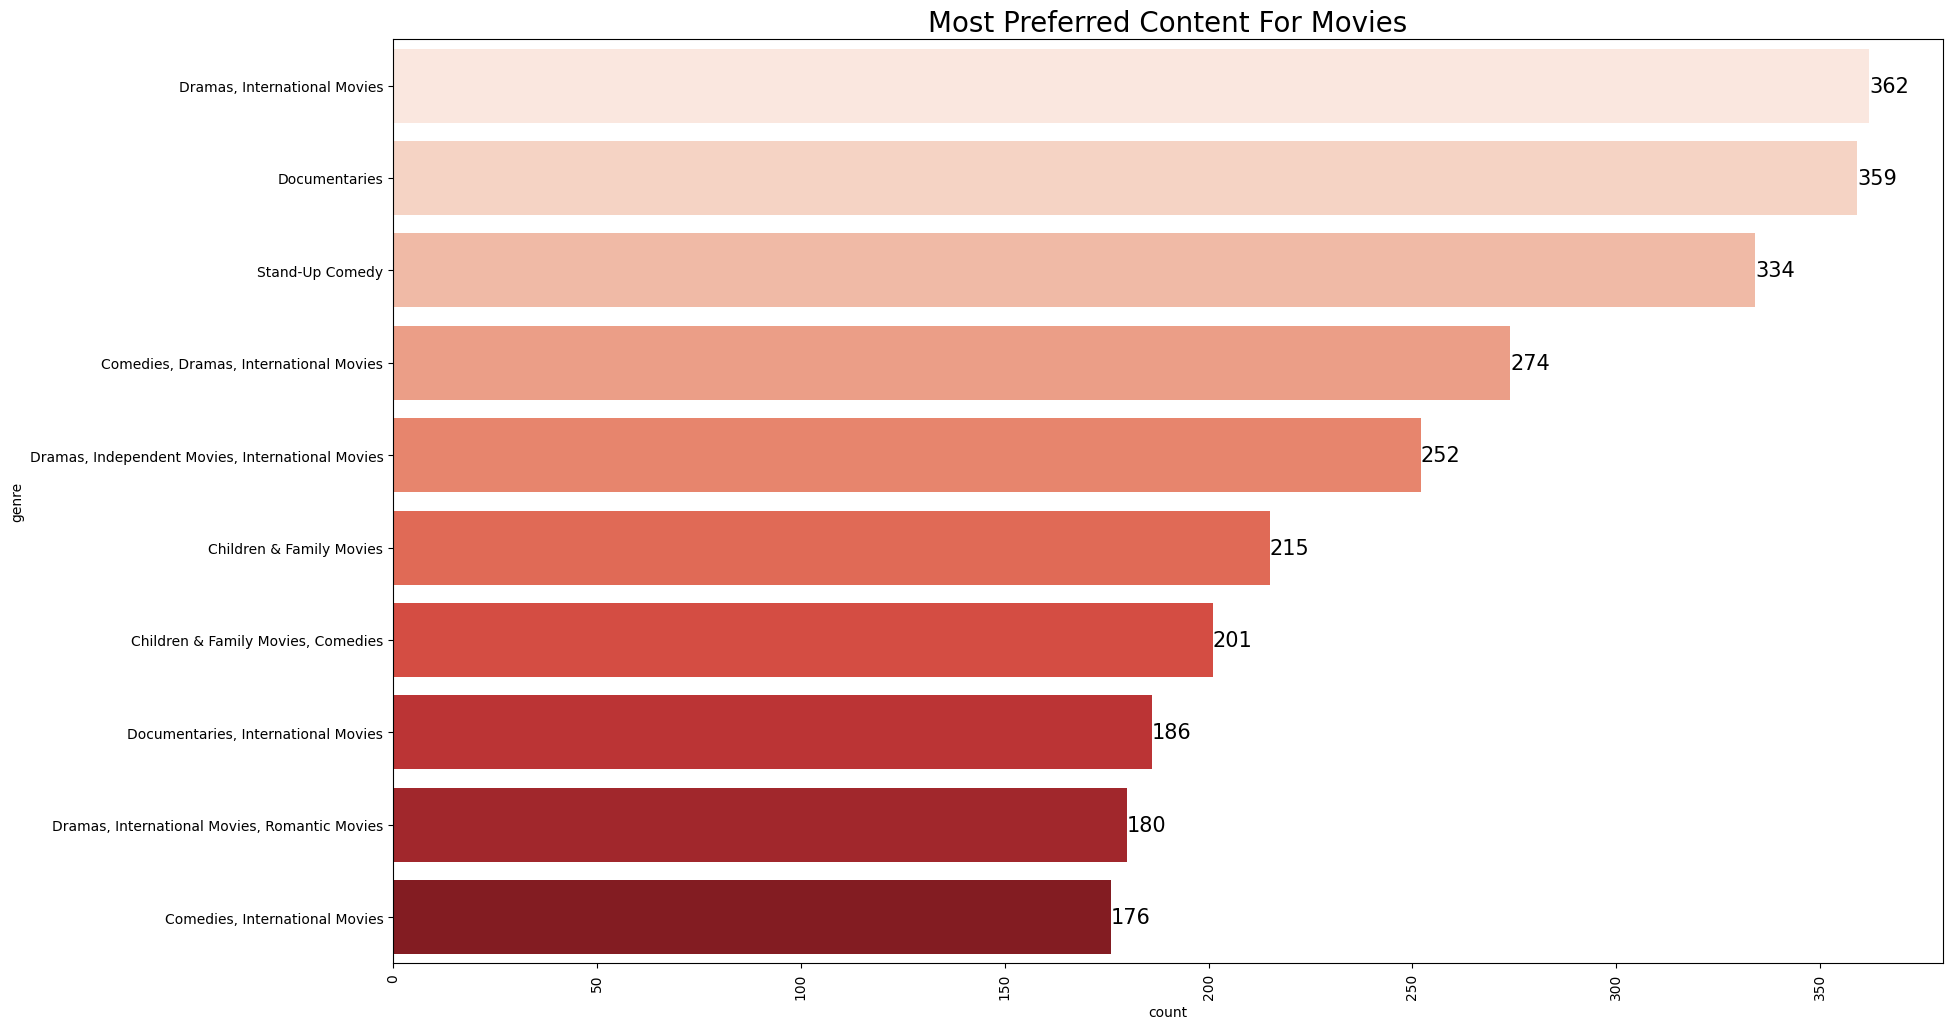

In [37]:
plt.figure(figsize=(20, 12))
plt.title("Most Preferred Content For Movies",fontsize=20)
c1=sns.countplot(y='genre',data=movie_df,palette="Reds",order=movie_df.genre.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

In [38]:
date_split=df.date_added.str.split(',')
df['added_date']=date_split.str.get(0)
df['added_year']=date_split.str.get(1)

In [39]:
month_split=df.added_date.str.split(' ')
df['added_month']=month_split.str.get(0)
df

show_id     type                  title         director        country  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1         s2  TV Show          Blood & Water          No Data   South Africa   
2         s3  TV Show              Ganglands  Julien Leclercq        No Data   
3         s4  TV Show  Jailbirds New Orleans          No Data        No Data   
4         s5  TV Show           Kota Factory          No Data          India   
...      ...      ...                    ...              ...            ...   
8802   s8803    Movie                 Zodiac    David Fincher  United States   
8803   s8804  TV Show            Zombie Dumb          No Data        No Data   
8804   s8805    Movie             Zombieland  Ruben Fleischer  United States   
8805   s8806    Movie                   Zoom     Peter Hewitt  United States   
8806   s8807    Movie                 Zubaan      Mozez Singh          India   

              date_added  release_year           rating   duration  \
0     September 25, 2021          2020            Teens     90 min   
1     September 24, 2021          2021  Mature Audience  2 Seasons   
2     September 24, 2021          2021  Mature Audience   1 Season   
3     September 24, 2021          2021  Mature Audience   1 Season   
4     September 24, 2021          2021  Mature Audience  2 Seasons   
...                  ...           ...              ...        ...   
8802   November 20, 2019          2007  Mature Audience    158 min   
8803        July 1, 2019          2018            Teens  2 Seasons   
8804    November 1, 2019          2009  Mature Audience     88 min   
8805    January 11, 2020          2006            Teens     88 min   
8806       March 2, 2019          2015            Teens    111 min   

                                                  genre    added_date  \
0                                         Documentaries  September 25   
1       International TV Shows, TV Dramas, TV Mysteries  September 24   
2     Crime TV Shows, International TV Shows, TV Act...  September 24   
3                                Docuseries, Reality TV  September 24   
4     International TV Shows, Romantic TV Shows, TV ...  September 24   
...                                                 ...           ...   
8802                     Cult Movies, Dramas, Thrillers   November 20   
8803             Kids' TV, Korean TV Shows, TV Comedies        July 1   
8804                            Comedies, Horror Movies    November 1   
8805                 Children & Family Movies, Comedies    January 11   
8806     Dramas, International Movies, Music & Musicals       March 2   

     added_year added_month  
0          2021   September  
1          2021   September  
2          2021   September  
3          2021   September  
4          2021   September  
...         ...         ...  
8802       2019    November  
8803       2019        July  
8804       2019    November  
8805       2020     January  
8806       2019       March  

[8790 rows x 13 columns]

In [40]:
df.drop(['date_added','added_date'], axis=1)

show_id     type                  title         director        country  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1         s2  TV Show          Blood & Water          No Data   South Africa   
2         s3  TV Show              Ganglands  Julien Leclercq        No Data   
3         s4  TV Show  Jailbirds New Orleans          No Data        No Data   
4         s5  TV Show           Kota Factory          No Data          India   
...      ...      ...                    ...              ...            ...   
8802   s8803    Movie                 Zodiac    David Fincher  United States   
8803   s8804  TV Show            Zombie Dumb          No Data        No Data   
8804   s8805    Movie             Zombieland  Ruben Fleischer  United States   
8805   s8806    Movie                   Zoom     Peter Hewitt  United States   
8806   s8807    Movie                 Zubaan      Mozez Singh          India   

      release_year           rating   duration  \
0             2020            Teens     90 min   
1             2021  Mature Audience  2 Seasons   
2             2021  Mature Audience   1 Season   
3             2021  Mature Audience   1 Season   
4             2021  Mature Audience  2 Seasons   
...            ...              ...        ...   
8802          2007  Mature Audience    158 min   
8803          2018            Teens  2 Seasons   
8804          2009  Mature Audience     88 min   
8805          2006            Teens     88 min   
8806          2015            Teens    111 min   

                                                  genre added_year added_month  
0                                         Documentaries       2021   September  
1       International TV Shows, TV Dramas, TV Mysteries       2021   September  
2     Crime TV Shows, International TV Shows, TV Act...       2021   September  
3                                Docuseries, Reality TV       2021   September  
4     International TV Shows, Romantic TV Shows, TV ...       2021   September  
...                                                 ...        ...         ...  
8802                     Cult Movies, Dramas, Thrillers       2019    November  
8803             Kids' TV, Korean TV Shows, TV Comedies       2019        July  
8804                            Comedies, Horror Movies       2019    November  
8805                 Children & Family Movies, Comedies       2020     January  
8806     Dramas, International Movies, Music & Musicals       2019       March  

[8790 rows x 11 columns]

In [41]:
month_dataset = pd.DataFrame(df.added_month.value_counts()).reset_index()
month_dataset.drop(12)
month_dataset

index  added_month
0        July          819
1    December          796
2   September          764
3       April          758
4     October          755
5      August          748
6       March          733
7     January          726
8        June          724
9    November          697
10        May          626
11   February          556
12                      88

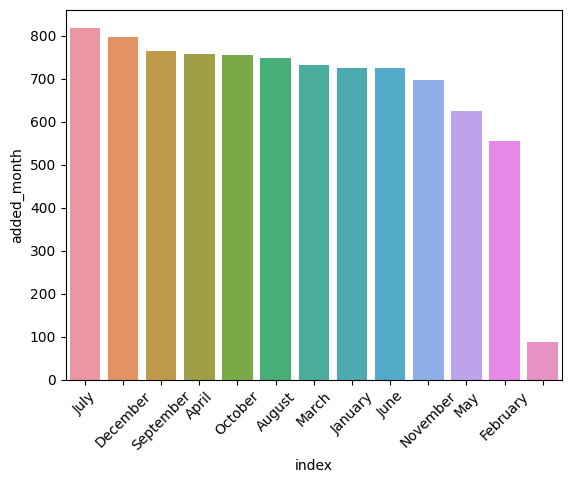

In [42]:
sns.barplot(x = "index", y = "added_month", data = month_dataset)
plt.xticks(rotation=45)
plt.show()

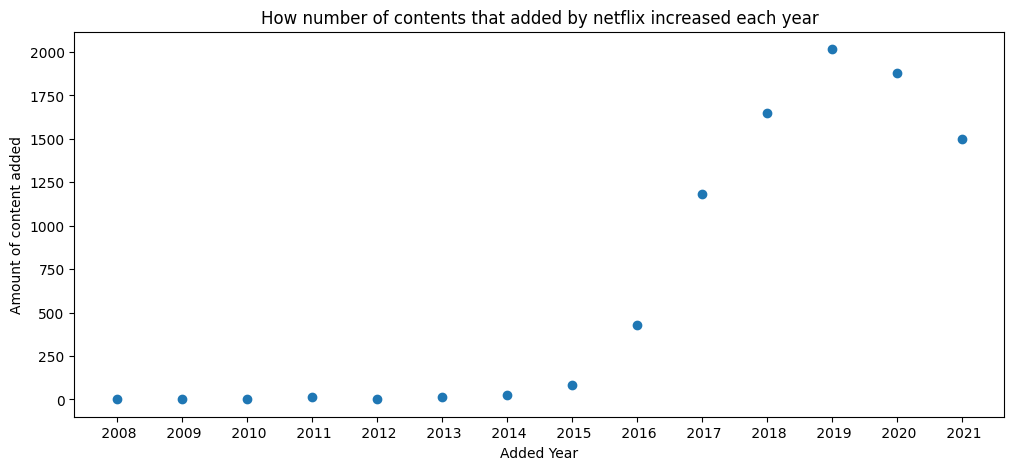

In [43]:
df_1=df.groupby("added_year")[["show_id"]].count()
plt.figure(figsize=(12,5))
x=df_1.index
y=df_1["show_id"]
plt.scatter(x,y)
plt.title("How number of contents that added by netflix increased each year")
plt.xlabel("Added Year")
plt.ylabel("Amount of content added")
plt.show()

In [44]:
df

show_id     type                  title         director        country  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1         s2  TV Show          Blood & Water          No Data   South Africa   
2         s3  TV Show              Ganglands  Julien Leclercq        No Data   
3         s4  TV Show  Jailbirds New Orleans          No Data        No Data   
4         s5  TV Show           Kota Factory          No Data          India   
...      ...      ...                    ...              ...            ...   
8802   s8803    Movie                 Zodiac    David Fincher  United States   
8803   s8804  TV Show            Zombie Dumb          No Data        No Data   
8804   s8805    Movie             Zombieland  Ruben Fleischer  United States   
8805   s8806    Movie                   Zoom     Peter Hewitt  United States   
8806   s8807    Movie                 Zubaan      Mozez Singh          India   

              date_added  release_year           rating   duration  \
0     September 25, 2021          2020            Teens     90 min   
1     September 24, 2021          2021  Mature Audience  2 Seasons   
2     September 24, 2021          2021  Mature Audience   1 Season   
3     September 24, 2021          2021  Mature Audience   1 Season   
4     September 24, 2021          2021  Mature Audience  2 Seasons   
...                  ...           ...              ...        ...   
8802   November 20, 2019          2007  Mature Audience    158 min   
8803        July 1, 2019          2018            Teens  2 Seasons   
8804    November 1, 2019          2009  Mature Audience     88 min   
8805    January 11, 2020          2006            Teens     88 min   
8806       March 2, 2019          2015            Teens    111 min   

                                                  genre    added_date  \
0                                         Documentaries  September 25   
1       International TV Shows, TV Dramas, TV Mysteries  September 24   
2     Crime TV Shows, International TV Shows, TV Act...  September 24   
3                                Docuseries, Reality TV  September 24   
4     International TV Shows, Romantic TV Shows, TV ...  September 24   
...                                                 ...           ...   
8802                     Cult Movies, Dramas, Thrillers   November 20   
8803             Kids' TV, Korean TV Shows, TV Comedies        July 1   
8804                            Comedies, Horror Movies    November 1   
8805                 Children & Family Movies, Comedies    January 11   
8806     Dramas, International Movies, Music & Musicals       March 2   

     added_year added_month  
0          2021   September  
1          2021   September  
2          2021   September  
3          2021   September  
4          2021   September  
...         ...         ...  
8802       2019    November  
8803       2019        July  
8804       2019    November  
8805       2020     January  
8806       2019       March  

[8790 rows x 13 columns]

In [45]:
def generate_rating_df(data):
    rating_df = data.groupby(['rating']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'counts']
    rating_df = rating_df.sort_values('rating')
    return rating_df

In [46]:
movie_rating_df = generate_rating_df(movie_df)
tv_rating_df = generate_rating_df(tv_df)
movie_rating_df 
tv_rating_df

rating  counts
0   General Audience     269
1    Mature Audience    1149
2  Parental Guidance     321
3              Teens     925

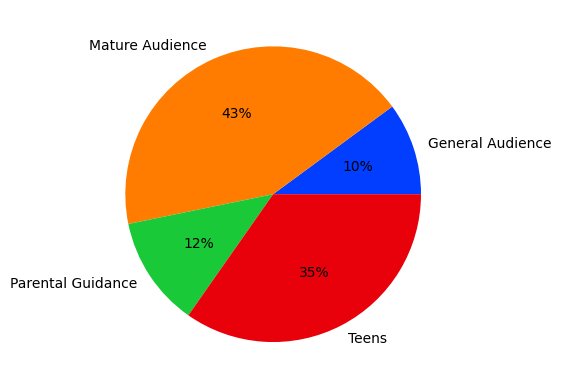

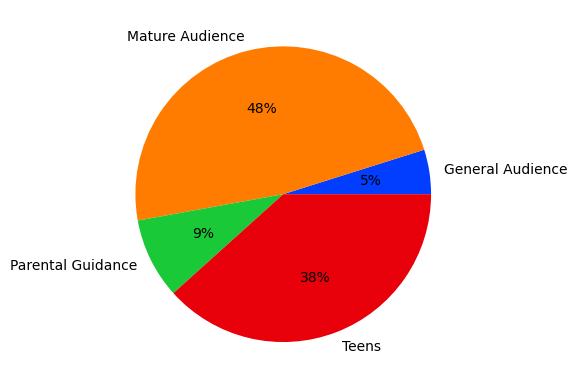

In [47]:
def info_tv_rating(df):
    palette_color = sns.color_palette('bright')
    plt.pie(df['counts'], labels=df['rating'], colors=palette_color, autopct='%.0f%%')
    plt.show()
info_tv_rating(tv_rating_df)
info_tv_rating(movie_rating_df)
